In [13]:
# 1. SPLIT DATA INTO CATEGORICAL AND NUMERIC DATA
# 2. FILL NUMERIC NANS THROUGH IMPUTATION
# 3. FILL CATEGORICAL NANS WITH 'NOTHING'
# 4. DETECT LOW-FREQUENCY LEVELS IN CATEGORICAL FEATURES AND BIN THEM UNDER 'OTHER'
# 5. ENCODE EACH CATEGORICAL VARIABLE INTO A SEQUENCE OF BINARY VARIABLES
# 6. MERGE YOUR ENCODED CATEGORICAL DATA WITH YOUR NUMERIC DATA
# 7. REMOVE FEATURES WITH NO VARIATION
# 8. REMOVE PERFECTLY-CORELATED FEATURES
# 9. SCALE YOUR DATA WITH ZERO MEAN AND UNIT VARIANCE
# 10. PERFORM GRID SEARCH AND RFE ON YOUR DATA TO FIND THE OPTIMAL ESTIMATOR FOR YOUR DATA
# 11. TRAIN AND TEST YOUR MODEL ON THE DATA
# 12. RECLEAN, SCALE AND AND ENCODE INCOMING UNLABELED DATA USING SAME STEPS, SCALERS, ETC.
# 13. INPUT YOUR SCALED, CLEANED ENCODED INCOMING DATA INTO YOUR MODEL

In [14]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('C:\\Users\\nreitz\\GAdata\\Airbnb\\train_users_2.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [16]:
#Take a look at the series in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [38]:
#Take a look at the values in each series.

for col in df:
    print col,': ', df[col].unique()

id :  ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ..., '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
date_account_created :  ['2010-06-28' '2011-05-25' '2010-09-28' ..., '2014-06-27' '2014-06-29'
 '2014-06-30']
timestamp_first_active :  [20090319043255 20090523174809 20090609231247 ..., 20140630235754
 20140630235822 20140630235824]
date_first_booking :  [nan '2010-08-02' '2012-09-08' ..., '2015-06-25' '2015-06-29' '2015-06-28']
gender :  ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
age :  [             nan   3.80000000e+01   5.60000000e+01   4.20000000e+01
   4.10000000e+01   4.60000000e+01   4.70000000e+01   5.00000000e+01
   3.60000000e+01   3.70000000e+01   3.30000000e+01   3.10000000e+01
   2.90000000e+01   3.00000000e+01   4.00000000e+01   2.60000000e+01
   3.20000000e+01   3.50000000e+01   5.90000000e+01   4.90000000e+01
   4.40000000e+01   3.40000000e+01   2.80000000e+01   1.90000000e+01
   5.30000000e+01   5.20000000e+01   3.90000000e+01   5.70000000e+01
   2.50000000e+01   5.40000000e+01   6

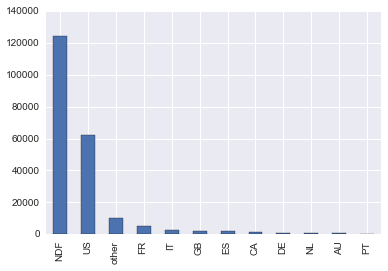

In [40]:
df.country_destination.value_counts().plot(kind='bar')
#Looks like a lot of people missing country destination. I'll probably want to clean them out.

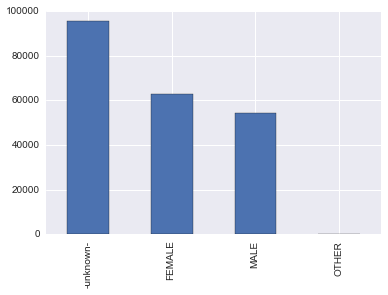

In [41]:
df.gender.value_counts().plot(kind='bar')
#Also a lot of unknowns on gender

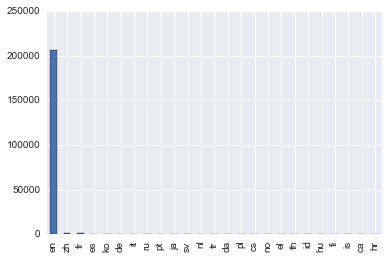

In [42]:
df.language.value_counts().plot(kind='bar')

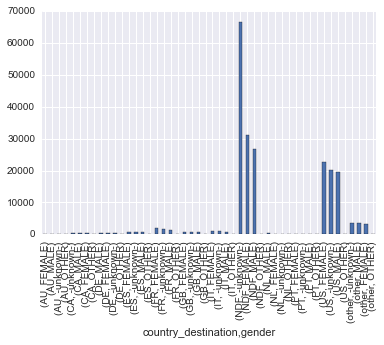

In [46]:
df.groupby('country_destination').gender.value_counts().plot(kind='bar')

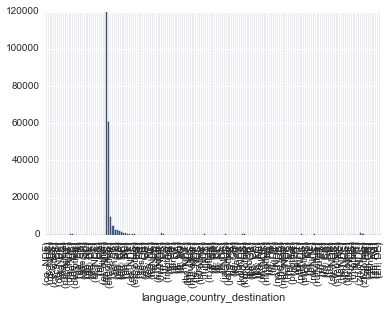

In [45]:
df.groupby('language').country_destination.value_counts().plot(kind='bar')

In [ ]:
#Need to clean out people missing info from language and destination in order to get anything useful out of this.